In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline



import os
import sys
import json

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import lib.dataset as dataset
import lib.network as network
import lib.utils as utils
import lib.vis as vis
from PIL import Image
from collections import deque
from tensorflow.python.tools import inspect_checkpoint
from moviepy.editor import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
epoch_dir="/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/aws/model_2018-03-25_20:12:51_L:0.1_E:10_B:16/epoch_9"
net=network.Network_restored(epoch_dir)
x,y=dataset.load_preprocessed_sample()
yp=net.predict(x)

KeyboardInterrupt: 

In [3]:
vis.multichannel(x)
vis.softmax(y)
vis.softmax(yp[0])

NameError: name 'x' is not defined

In [ ]:
loss_paths = utils.construct_path_lists("aws", "loss.npy")
for path in loss_paths:
    print(path)
    print(utils.grep_learning_rate(path))
    loss_arr = np.load(path)
    print(loss_arr.shape)
    plt.plot(loss_arr.flat)
    plt.show()

In [ ]:
p=np.load("voxel_prediction.npy")
p=np.transpose(p,[0,1,3,4,2])

In [ ]:
vp=np.load("voxel_prediction.npy")[23]
vp=np.transpose(vp,[0,2,3,1])
vis.softmax(vp)

In [ ]:

vis.softmax(p[0])

In [ ]:
weights=np.load("/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/data/ResidualGRUNet.npy")

In [31]:
l=utils.list_folders("aws")[-1]
png_ls=utils.construct_path_lists("aws/model_2018-04-02_20:10:12_L:0.1_E:40_B:16", "_p.png")

In [32]:
png_ls

[]

In [30]:
for f in png_ls:
    obj_id=utils.grep_obj_id(f)
    n=utils.grep_stepcount(f)
    new_name=os.path.dirname(f)+"/"+n+'_'+obj_id+'_yp.png'
#     print(f,new_name)
    os.rename(f,new_name)
    

In [33]:
png_ls

[]

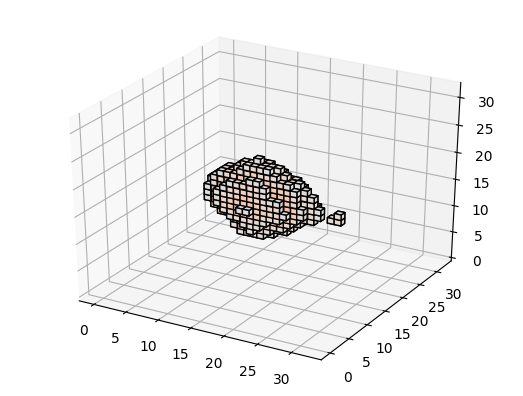

In [8]:
Image.open(png_ls[2])

In [17]:
clip=ImageSequenceClip(png_ls,1)

In [18]:
clip.write_videofile("movie.mp4")

[MoviePy] >>>> Building video movie.mp4
[MoviePy] Writing video movie.mp4


 75%|███████▌  | 3/4 [00:00<00:00, 53.21it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: movie.mp4 

